# COMPANY CLASSIFICATION - **using clustering Algo** #
## ---------START OF DATA PROCESSING------- #

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('testdata.csv')

In [0]:
df.head()

In [0]:
df.describe()

In [0]:
td = df.columns.str.contains('^Unnamed')

In [0]:
df = df.loc[:,~td]

In [0]:
df.head()

In [0]:
df.describe()

In [0]:
df = df.dropna(subset=['housing_flg'])

In [0]:
df.isnull().head()

In [0]:
col1 = df.iloc[:,0]

In [0]:
col1 = pd.DataFrame(col1)

In [0]:
col1.head()

In [0]:
df = df.rename( columns = {df.columns[1]:"Link"})

In [0]:
from googlesearch import search

In [0]:
#performs a final search for the nan values and replaces in the columns.
#only 36 nan remaining.
count = 0
for val,row in df.iterrows():
        if(str(row[df.columns[1]])==('nan')):
            query = str(row[df.columns[0]])
            print(query)
            for j in search(query,tld = 'com',num = 10, stop =1,pause = 2):
                row[df.columns[1]]= j
                print(j)
                count = count+1
                print(row[df.columns[1]])

In [0]:
col3 = pd.DataFrame()

In [0]:
lst = list()
for val,row in df.iterrows():
    if(str(row[df.columns[1]])=='nan'):
        lst.append(row[df.columns[0]])

In [0]:
col3 = pd.DataFrame(lst)

col3.rename(columns={0:'No LINK Company'}).head()
#col3 holds all nan linked companies

In [0]:
df = df.dropna(subset=[df.columns[1]])
df.describe()
#dropped all nan links with rows

## Data is removed of missing links
### *col3* holds the rows with missing links.
### df holds the rows with valid links.

# USING WORDNINJA ON COL3 :3

In [0]:
import wordninja

In [0]:
col3.head()

In [0]:
lst = list()
for val,row in col3.iterrows():
    lst.append(row[col3.columns[0]])

In [0]:
lst2 = list();
for i in lst:
    lst2.append(wordninja.split(i))

In [0]:
lst3 = list()
for i in lst2:
    str = ''
    for j in i:
        str+=j+' '
    lst3.append(str)

In [0]:
altmiss = pd.DataFrame(lst3)

In [0]:
altmiss['link']=' '

In [0]:
for val,row in altmiss.iterrows():
    query = row[altmiss.columns[0]]
    print(query)
    for j in search(query,tld = 'com',num = 10, stop =1,pause = 2):
        row[altmiss.columns[1]]= j
        print(j)
        count = count+1
        print(row[altmiss.columns[1]])

In [0]:
altmiss = altmiss.rename(columns = {altmiss.columns[0]:'Company',altmiss.columns[1]:'Link'})

altmiss.describe()

In [0]:
df = df.rename(columns = {df.columns[0]:'Company',df.columns[1]:'Link'})
df.describe()

In [0]:
mp = df.append(altmiss)
#MP HOLDS FINAL VALUES ALONG WITH ALTERED MISSING VALUES

mp.describe()

## FOUND MISSING VALUES - LINK with 100% rate -
### STORED IN MP

In [0]:
duplicateColsDF = mp[mp.duplicated(subset = [mp.columns[1]])] #GETTING ALL DUPLICATES WITH RESPECT TO ONLY COLUMNS
duplicateColsDF.describe()
#value = 591
duplicateRowsDF = mp[mp.duplicated(subset = [mp.columns[0]])] #GETTING ALL DUPLICATES WITH RESPECT TO ONLY ROWS
#value = 27
duplicateDF = mp[mp.duplicated()] #GETTING ALL DUPLICATES WITH RESPECT TO COLUMN AND ROWS
#value = 20

In [0]:
mp2 = mp.drop_duplicates()
mp2.sort_index(axis = 1,inplace = True)

In [0]:
mp2.to_csv(path_or_buf='/home/roshan/Desktop/INTERNSHIP/CLUSTERINGALGO/missing_replaced_rem_dup.csv',columns=['Company','Link'],index=False)

# REMOVED DUPLICATE VALUES AND STORED IN MP2 CONVERTED TO csv FORMAT

# Retrieving RELiABLE content

In [0]:
import pandas as pd

In [0]:
newdf = pd.read_csv('missing_replaced_rem_dup.csv')

In [0]:
newdf.head()

In [0]:
newdf.insert(2,'Title',0)

In [0]:
newdf.head()

In [0]:
workdf = newdf.head(50)
workdf.head()

In [0]:
from urllib.parse import urlparse

### OBTAINING NAME FROM ACRONYM (LIMITATION: WORKS ONLY FOR THE ACROnYMS that are IFSC code)

In [0]:
from googlesearch import search
from bs4 import BeautifulSoup
import requests
import urllib.request

In [0]:
for i,j in workdf.iterrows():
    if(len(workdf['Company'][i]))<=5:
        str_list = list('https://www.ifsccodebank.com/search-by-IFSC-code.aspx?IFSCCode=')
        link2 = workdf['Company'][i]
        print(link2,type(link2))
        str_list.append(link2)
        url = ''.join(str_list)
        print(url)
        response = requests.get(''.join(str_list))
        soup = BeautifulSoup(response.text,'html.parser')
        t = soup.get_text()
        r = t[t.find(link2)+7:]
        workdf['Title'][i] = (r[:r.find('-')-5].strip())
        for j in search(str(workdf['Title'][i]),stop = 1):
            workdf['Link'][i] = j
    else:
        workdf['Title'][i] = 'err'


In [0]:
workdf

### FOR non-acronym companies --- OBTAINING TITLE from LINK(column - WEBPAGE) TITLE

In [0]:
count = 0
for i,j in workdf.iterrows():
    if workdf['Title'][i]=='err' or workdf['Title'][i].startswith('ifsccode') or workdf['Title'][i]=='0':
        url = workdf['Link'][i]
        print(url)
        try:
            response = requests.get(url,verify = False)
            soup = BeautifulSoup(response.text,"html.parser")
            print(soup.title.text)
            workdf['Title'][i]= soup.title.text
            count = count+1
            print(count)
        except:
            workdf['Title'][i]= '-1'
            continue
print(count)

### OBTAINING BANK NAME FROM LINKS THAT HAVE TITLE 'IFSC'

In [0]:
for i,j in workdf.iterrows():
    if 'IFSC' in str(workdf['Title'][i]) or workdf['Title'][i]==-1:
        query = workdf['Company'][i] + 'Bank'
        for j in search(query,stop = 1):
            workdf['Link'][i] = j
        workdf['Title'][i] = '0'

In [0]:
workdf

### ACCURACY - approx(30/50)

In [0]:
work2df = workdf.head(32)

work2df

## FOR BETTER DATA -- OBTAINING INFO FROM WIKI.. WHEREVER POSSIBLE

In [0]:
work2df['WIKI']=0
for i,j in work2df.iterrows():
    query=work2df['Title'][i] + 'Wikipedia'
    for j in search(query,stop = 1):
        work2df['WIKI'][i] = j
    if('wikipedia' not in str(work2df['WIKI'][i])):
        work2df['WIKI'][i] = work2df['Link'][i]
work2df

## OBTAINING CONTENT FROM WIKI ==> or if not available ==> from OFFICIAL LINK

In [0]:
work2df['Content'] = 0
for i,j in work2df.iterrows():
    url = work2df['WIKI'][i]
    print(url)
    response = requests.get(url,verify = False)
    soup = BeautifulSoup(response.text,'html.parser')
    t= soup.find('p')
    r = t.find_next_sibling('p')
    if 'NoneType'in str(type(r)):
        work2df['Content'][i] = t.text
    else:
        if r.text.strip() == '':
            y=r.find_next_sibling('p')
            print(y.text)
            work2df['Content'][i] = y.text
        else:
            print(r.text)
            work2df['Content'][i] = r.text

In [0]:

work2df

In [0]:
work2df.to_csv(path_or_buf='/home/roshan/Desktop/INTERNSHIP/CLUSTERINGALGO/.csv',columns=['Company','Link'],index=False)

#  Data_Cleaning ==>

#### CREATING FUNCTION because all document must be cleaned (here document is same as content column of DATAFRAME 

In [0]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving finaldf2.csv to finaldf2 (2).csv


In [304]:
finaldf = pd.read_csv('finaldf2 (2).csv')
finaldf.shape

(100, 3)

In [0]:
def data_clean(content):
    # 1. SPLITTING INTO WORDS
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(str(content))
    # 2. CONVERT WORDS TO LOWERCASE
    words_punc=list()
    for i in tokens:
        words_punc.append(i.lower())
    # 3. REMOVE PUNCTUATIONS
    import string
    table = str.maketrans('','',string.punctuation)
    alphanum = [i.translate(table) for i in words_punc ]
    # 4. REMOVE NOT CHAR TOKENS
    alphaonly = [i for i in alphanum if i.isalpha() ]
    # 5. REMOVE STOPWORDS
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [i for i in alphaonly if not i in stop_words]

    ### Lemmatizing OF WORDS
    #!!!!! ---- NOT STEMMING BECAUSE IT CUTS SHORT THE IMPORTANT WORDS -----!!!!#
    # NEED TO TRY WITH STEMMING #

    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    word = list()
    for i in words:
        word.append(lemmatizer.lemmatize(i,'v'))

    return(word)

#### TESTDATA

In [0]:
def dummy_fun(doc):
    return doc

In [307]:
finaldf.shape[0]

100

In [0]:
lst = list()
for i in range(finaldf.shape[0]):
  if str(finaldf['WIKI'][i]).__contains__('wiki'):
    lst.append(data_clean(finaldf['Content'][i]))
    

In [309]:
import nltk
 nltk.download('stopwords')

IndentationError: ignored

In [310]:
len(lst)

56

# Processing Textual Data using Count Vectorizer

In [311]:
finaldf.head()

,Company,WIKI,Content
0,AADHAR HOUSING FINAN,https://aadharhousing.com/,Copyright 2017. Aadhar Housing Finance Limited...
1,AAMAADMIPARTY,https://aamaadmiparty.org/,ले कर रहेंगे पूर्ण राज्य ! With full statehood...
2,Aavas Financiers Lim,https://www.aavas.in/,\n\nCARE ratings has upgraded the Long term ra...
3,ABHIPRA CAPITAL LTD,https://www.abhipra.com/,Complete Financial Market Services under one roof
4,ANDB,https://en.wikipedia.org/wiki/Andhra_Bank,"Andhra Bank (BSE: 532418, NSE: ANDHRABANK) is..."


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vect_count = CountVectorizer(lowercase=False,preprocessor=dummy_fun, tokenizer= dummy_fun)

In [0]:
vect_matrix = vect_count.fit_transform(lst)

In [0]:
vect2_df = pd.DataFrame(vect_matrix.toarray(),columns = vect_count.get_feature_names())

In [0]:
for i in vect2_df.columns:
  count = 0
  for j,k in vect2_df.iterrows():
    if(vect2_df[i][j])!=0:
      count = count+1
  if(count ==1):
    del vect2_df[i]

# Processing Textual Data using TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:

vectorizer = TfidfVectorizer(use_idf = True,sublinear_tf=True,analyzer='word',preprocessor=dummy_fun,tokenizer=dummy_fun,norm='l2')

In [92]:
vec_1 = vectorizer.fit_transform(lst)
type(vec_1)

scipy.sparse.csr.csr_matrix

In [93]:
len(vectorizer.get_feature_names())

698

In [94]:
vec_1.shape

(56, 698)

In [0]:
vect_df = pd.DataFrame(vec_1.toarray(),columns = vectorizer.get_feature_names())

In [0]:
for i in vect_df.columns:
  count = 0
  for j,k in vect_df.iterrows():
    if(vect_df[i][j])!=0:
      count = count+1
  if(count ==1):
    del vect_df[i]

In [97]:
vect_df.shape

(56, 354)

In [0]:
vect2_df = vect_df

In [255]:
vect2_df.head()

,abu,accept,access,account,across,act,additive,adjacent,advice,algebraic,allahabad,along,also,among,analytics,antwerp,april,around,asset,assets,associate,association,atms,au,aught,authenticate,authentication,available,back,bal,bank,base,bbps,become,beijing,bengaluru,bharati,billion,birth,block,...,taxation,technology,term,territories,throughout,time,top,total,touch,trillion,ubi,uk,union,unite,update,us,use,valid,value,various,vehicle,vehicles,venture,vibhushan,war,wealth,well,wholly,wide,within,work,world,worldwide,year,york,zero,zilch,zip,ɔːt,ರ
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181240,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.177146,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.154204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253741,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157774,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.142963,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15421,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113558,0.0,0.0,0.171059,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.289628,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.117902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192446,0.0,0.0,0.000000,0.0,0.175814,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.175814,0.0,0.0,0.0,0.0,0.0


# Performing K(2) means Clustering..


In [0]:
from sklearn.cluster import KMeans

In [268]:
true_k = 2
kmeans = KMeans(n_clusters = true_k,init = 'k-means++',max_iter = 500,n_init = 1)
kmeans = kmeans.fit(vect2_df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
from sklearn.decomposition import PCA
clusters = kmeans.predict(vect2_df)
pca = PCA(n_components=2)
two_dim = pca.fit_transform(vect2_df.to_dense())

In [0]:
scatter_x = two_dim[:,0]
scatter_y = two_dim[:,1]

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(array([ 1,  3,  5,  6, 27, 28, 29, 30, 31, 33, 34, 35, 36, 39, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 54, 55]),)
(array([ 0,  2,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 32, 37, 38, 40, 41, 42, 53]),)


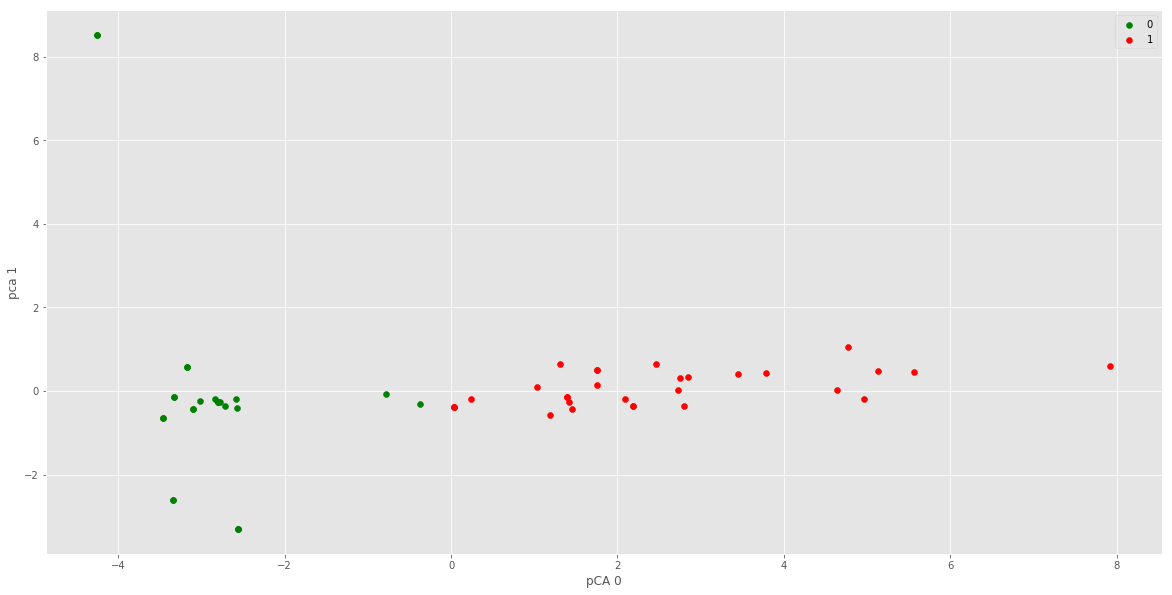

In [272]:
plt.style.use('ggplot')
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
cmap = {0:'green',1:'red',2:'yellow'}
for group in np.unique(clusters):
  ix = np.where(clusters == group)
  print(ix)
  ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)
ax.legend()
plt.xlabel('pCA 0')
plt.ylabel('pca 1')
plt.show()

In [0]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vect2_df.columns

In [274]:
for i in range (true_k):
  print('Cluster %d: '%i)
  for ind in order_centroids[i,:]:
    print(terms[ind],sum(vect2_df[terms[ind]]))
  print()

Cluster 0: 
school 12
mutual 10
use 11
fund 10
number 10
india 72
company 20
indian 23
insurance 10
http 8
public 20
life 9
contract 7
term 8
digit 6
zero 6
return 7
include 13
bharati 6
bal 6
provide 7
found 13
permanent 5
declare 4
limit 9
despite 5
investors 4
plan 4
publish 4
rat 4
analytics 4
person 4
client 4
authenticate 4
authentication 4
bank 141
financial 20
across 10
structure 3
ರ 3
rank 8
body 5
people 5
management 5
service 16
group 5
country 8
member 4
delhi 4
institute 4
society 4
civil 3
valid 3
insure 3
legal 3
liability 3
one 14
lala 3
institutions 3
wealth 3
vibhushan 3
philanthropist 3
govern 3
hansraj 3
child 3
block 3
education 3
response 3
bbps 3
gupta 3
premier 3
parent 3
padma 3
among 6
educate 3
level 3
commercial 10
new 5
loan 4
also 8
hold 8
information 4
stock 4
end 6
become 2
market 7
us 6
finance 13
report 7
uk 6
multinational 6
highnetworth 2
generally 2
hedge 2
occasional 2
estate 2
stockoption 2
vehicles 2
deliver 2
businesssuccession 2
derivatives 2
a

In [0]:
train_df = pd.DataFrame()

In [0]:
lst_comp = list()
for i,j in finaldf.iterrows():
  if 'wiki' in str(finaldf['WIKI'][i]):
    lst_comp.append(finaldf['Company'][i])
train_df['Title'] = lst_comp

In [0]:
train_df['Cluster'] = kmeans.labels_.tolist()

In [278]:
train_df

,Title,Cluster
0,ANDB,1
1,BARB,0
2,BKID,1
3,CITI,0
4,CNRB,1
5,CORP,0
6,DR FILE DTD,0
7,HDFC,1
8,HSBC,1
9,IBKL,1


In [0]:
from sklearn.metrics import silhouette_score
score = silhouette_score(vect2_df,clusters)

In [280]:
score

0.1625031508827885

# Performing agglomerative clustering algorithm

In [0]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

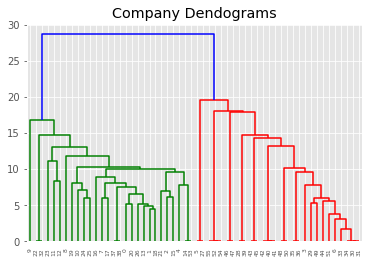

In [318]:
import scipy.cluster.hierarchy as shc 
plt.title("Company Dendograms")  
dend = shc.dendrogram(shc.linkage(vect2_df.values, method='ward'))  

In [325]:
from sklearn.cluster import AgglomerativeClustering

aggcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aggcluster.fit_predict(vect2_df.values) 

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [0]:
scatter_x = two_dim[:,0]
scatter_y = two_dim[:,1]

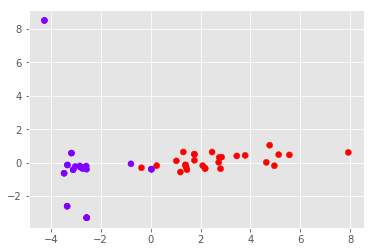

In [327]:
plt.scatter(scatter_x,scatter_y,c=aggcluster.labels_,cmap = 'rainbow')